### Multivariate PCA

Multivariate PCA is used to reduce the dimension of the dataset so that it can be feed into the machine learning model.

In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import pdb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
#import the dataset
data = pd.read_excel("Itr_6.xlsx")
data

,Wavelength,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,400,0.054,0.323,0.043,0.541,0.372,0.836,0.402,0.402,0.267,...,0.424,0.442,0.460,0.404,0.555,0.512,0.524,0.401,0.445,0.510
1,405,0.053,0.319,0.043,0.535,0.368,0.795,0.397,0.398,0.264,...,0.420,0.437,0.456,0.400,0.549,0.506,0.518,0.397,0.440,0.504
2,410,0.053,0.316,0.043,0.530,0.365,0.740,0.394,0.394,0.262,...,0.415,0.433,0.451,0.396,0.543,0.501,0.513,0.393,0.436,0.499
3,415,0.052,0.313,0.042,0.526,0.361,0.674,0.391,0.390,0.259,...,0.412,0.429,0.447,0.393,0.538,0.496,0.508,0.390,0.432,0.494
4,420,0.052,0.310,0.042,0.522,0.358,0.606,0.388,0.387,0.257,...,0.409,0.426,0.444,0.390,0.534,0.492,0.504,0.387,0.428,0.489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,880,0.066,0.105,0.055,0.093,0.098,0.056,0.080,0.135,0.063,...,0.165,0.107,0.157,0.097,0.201,0.260,0.249,0.156,0.191,0.303
97,885,0.070,0.104,0.056,0.092,0.096,0.057,0.079,0.131,0.064,...,0.159,0.105,0.150,0.096,0.192,0.246,0.240,0.151,0.184,0.288
98,890,0.068,0.100,0.056,0.090,0.094,0.057,0.078,0.126,0.064,...,0.151,0.102,0.144,0.093,0.179,0.227,0.222,0.143,0.173,0.264
99,895,0.069,0.098,0.057,0.089,0.092,0.058,0.078,0.122,0.064,...,0.146,0.100,0.138,0.092,0.169,0.213,0.208,0.138,0.165,0.245


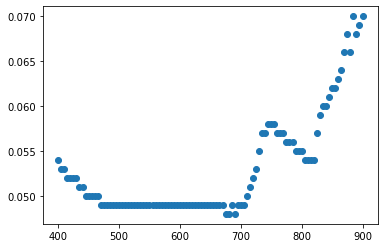

In [3]:
#check the dataset
b=data.iloc[:,1:2]
a=data.iloc[:,0:1]
plt.scatter(a,b)

In [4]:
Y = data.iloc[:,1:97]
Data = Y.T
Data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
A1,0.054,0.053,0.053,0.052,0.052,0.052,0.052,0.051,0.051,0.050,...,0.062,0.063,0.064,0.066,0.068,0.066,0.070,0.068,0.069,0.070
A2,0.323,0.319,0.316,0.313,0.310,0.309,0.307,0.305,0.304,0.302,...,0.126,0.121,0.116,0.113,0.110,0.105,0.104,0.100,0.098,0.097
A3,0.043,0.043,0.043,0.042,0.042,0.042,0.041,0.041,0.041,0.040,...,0.050,0.051,0.052,0.054,0.056,0.055,0.056,0.056,0.057,0.058
A4,0.541,0.535,0.530,0.526,0.522,0.519,0.517,0.514,0.512,0.511,...,0.101,0.099,0.097,0.096,0.096,0.093,0.092,0.090,0.089,0.089
A5,0.372,0.368,0.365,0.361,0.358,0.356,0.353,0.350,0.348,0.346,...,0.113,0.109,0.106,0.104,0.102,0.098,0.096,0.094,0.092,0.091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H8,0.512,0.506,0.501,0.496,0.492,0.489,0.485,0.482,0.480,0.478,...,0.379,0.351,0.325,0.302,0.282,0.260,0.246,0.227,0.213,0.201
H9,0.524,0.518,0.513,0.508,0.504,0.500,0.497,0.494,0.492,0.490,...,0.359,0.334,0.310,0.290,0.271,0.249,0.240,0.222,0.208,0.197
H10,0.401,0.397,0.393,0.390,0.387,0.385,0.383,0.381,0.380,0.378,...,0.199,0.189,0.180,0.172,0.165,0.156,0.151,0.143,0.138,0.134
H11,0.445,0.440,0.436,0.432,0.428,0.425,0.423,0.421,0.419,0.417,...,0.258,0.242,0.228,0.216,0.205,0.191,0.184,0.173,0.165,0.158


In [5]:
#Standardization
scaler = StandardScaler()
scaler.fit(Data)
scaled_Data = scaler.transform(Data)
scaled_Data.shape

(96, 101)

In [7]:
# PCA with Component = 8
pca = PCA(n_components=8)
pca.fit(scaled_Data)
PC =pca.transform(scaled_Data)
print(PC.shape)

(96, 8)


In [8]:
#check PC1
PC1 = pca.inverse_transform(PC[0,:])
#PC1

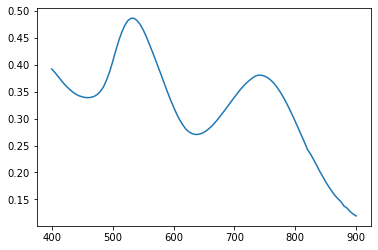

In [9]:
#plot mean value
plt.plot(data.iloc[:,0],Data.values.mean(axis=0))

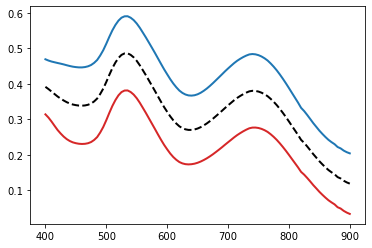

In [10]:
#PC1
x = data.iloc[:,0]
y1 = Data.values.mean(axis=0)+ pca.inverse_transform(np.array([-1,0,0,0,0,0,0,0]))
y2 = Data.values.mean(axis=0)
y3 = Data.values.mean(axis=0)+pca.inverse_transform(np.array([1,0,0,0,0,0,0,0]))

plt.plot(x, y1, color='tab:red', lw=2.0) # mean - std 
plt.plot(x, y2, color='k', ls='--', lw=2.0) # mean
plt.plot(x, y3, color='tab:blue', lw=2.0) # mean + std
plt.show()

Princile component 1 associate with the peak hight.

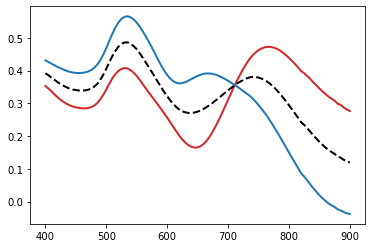

In [11]:
#PC2
x = data.iloc[:,0]
y1 = Data.values.mean(axis=0)+ pca.inverse_transform(np.array([0,-1,0,0,0,0,0,0]))
y2 = Data.values.mean(axis=0)
y3 = Data.values.mean(axis=0)+pca.inverse_transform(np.array([0,1,0,0,0,0,0,0]))

plt.plot(x, y1, color='tab:red', lw=2.0) # mean - std 
plt.plot(x, y2, color='k', ls='--', lw=2.0) # mean
plt.plot(x, y3, color='tab:blue', lw=2.0) # mean + std
plt.show()

Principle component 2 is associated with the second peak position

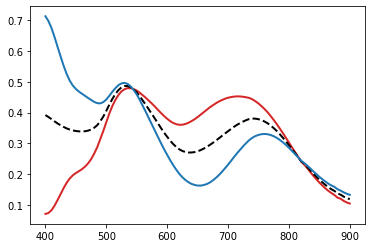

In [12]:
#PC3
x = data.iloc[:,0]
y1 = Data.values.mean(axis=0)+ pca.inverse_transform(np.array([0,0,-1,0,0,0,0,0]))
y2 = Data.values.mean(axis=0)
y3 = Data.values.mean(axis=0)+pca.inverse_transform(np.array([0,0,1,0,0,0,0,0]))

plt.plot(x, y1, color='tab:red', lw=2.0) # mean - std 
plt.plot(x, y2, color='k', ls='--', lw=2.0) # mean
plt.plot(x, y3, color='tab:blue', lw=2.0) # mean + std
plt.show()

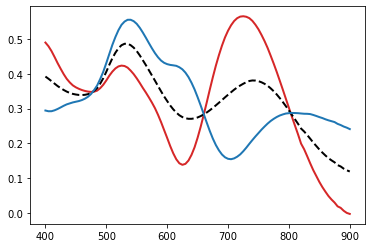

In [13]:
#PC4
x = data.iloc[:,0]
y1 = Data.values.mean(axis=0)+ pca.inverse_transform(np.array([0,0,0,-1,0,0,0,0]))
y2 = Data.values.mean(axis=0)
y3 = Data.values.mean(axis=0)+pca.inverse_transform(np.array([0,0,0,1,0,0,0,0]))

plt.plot(x, y1, color='tab:red', lw=2.0) # mean - std 
plt.plot(x, y2, color='k', ls='--', lw=2.0) # mean
plt.plot(x, y3, color='tab:blue', lw=2.0) # mean + std
plt.show()

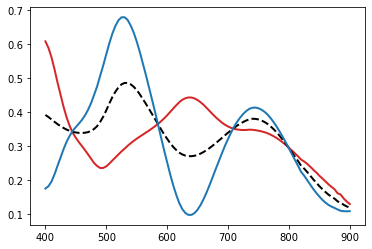

In [14]:
#PC5
x = data.iloc[:,0]
y1 = Data.values.mean(axis=0)+ pca.inverse_transform(np.array([0,0,0,0,-1,0,0,0]))
y2 = Data.values.mean(axis=0)
y3 = Data.values.mean(axis=0)+pca.inverse_transform(np.array([0,0,0,0,1,0,0,0]))

plt.plot(x, y1, color='tab:red', lw=2.0) # mean - std 
plt.plot(x, y2, color='k', ls='--', lw=2.0) # mean
plt.plot(x, y3, color='tab:blue', lw=2.0) # mean + std
plt.show()

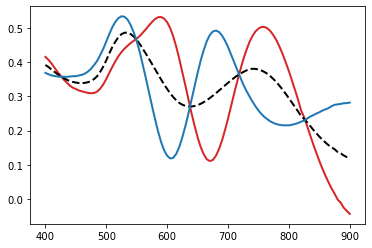

In [15]:
#PC6
x = data.iloc[:,0]
y1 = Data.values.mean(axis=0)+ pca.inverse_transform(np.array([0,0,0,0,0,-1,0,0]))
y2 = Data.values.mean(axis=0)
y3 = Data.values.mean(axis=0)+pca.inverse_transform(np.array([0,0,0,0,0,1,0,0]))

plt.plot(x, y1, color='tab:red', lw=2.0) # mean - std 
plt.plot(x, y2, color='k', ls='--', lw=2.0) # mean
plt.plot(x, y3, color='tab:blue', lw=2.0) # mean + std
plt.show()

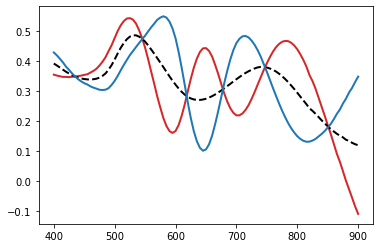

In [16]:
#PC7
x = data.iloc[:,0]
y1 = Data.values.mean(axis=0)+ pca.inverse_transform(np.array([0,0,0,0,0,0,-1,0]))
y2 = Data.values.mean(axis=0)
y3 = Data.values.mean(axis=0)+pca.inverse_transform(np.array([0,0,0,0,0,0,1,0]))

plt.plot(x, y1, color='tab:red', lw=2.0) # mean - std 
plt.plot(x, y2, color='k', ls='--', lw=2.0) # mean
plt.plot(x, y3, color='tab:blue', lw=2.0) # mean + std
plt.show()

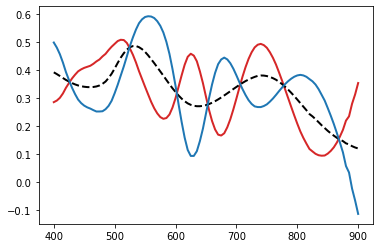

In [17]:
#PC8
x = data.iloc[:,0]
y1 = Data.values.mean(axis=0)+ pca.inverse_transform(np.array([0,0,0,0,0,0,0,-1]))
y2 = Data.values.mean(axis=0)
y3 = Data.values.mean(axis=0)+pca.inverse_transform(np.array([0,0,0,0,0,0,0,1]))

plt.plot(x, y1, color='tab:red', lw=2.0) # mean - std 
plt.plot(x, y2, color='k', ls='--', lw=2.0) # mean
plt.plot(x, y3, color='tab:blue', lw=2.0) # mean + std
plt.show()

# Summary

Moving one standard deviation away from the mean(dotted black curve) along PC1 direction changes peaks hight. PC2 can be associated with the second peak's position...........